In [ ]:
import os

# 👇 Student: Please change the below line to the full path to the "ML_Hackathon_Task_B_Predict_Chla_from_Sentinel-3_OLCI_at_Chesapeake_Bay" folder
wd = "/content/WORKSHOP-CGC-SCIPE-AI-ML-2025/Day2-ML/ML_Hackathon_Task_B_Predict_Chla_from_Sentinel-3_OLCI_at_Chesapeake_Bay"

if 'wd' in locals() and wd.strip() != "":
    os.chdir(wd)
    print("✅ Current working directory set to:", os.getcwd())
else:
    print("⚠️ Please set 'wd' to your folder path above before running this cell.")


 ## Block 1: Understand the data structure ##

In [ ]:
import numpy as np
import pandas as pd
import os
import random

# Paths
patch_dir = "MatchedPatches"
index_file = os.path.join(patch_dir, "patch_index.csv")

# Load patch index
patch_idx = pd.read_csv(index_file)
print("Index file preview:")
print(patch_idx.head())

# List  .npz files total number
npz_files = [f for f in os.listdir(patch_dir) if f.endswith(".npz")]
print(f"Found {len(npz_files)} patches")

# Pick one at random
sample_file = random.choice(npz_files)
print("Random sample file:", sample_file)

# Load it
patch = np.load(os.path.join(patch_dir, sample_file))

# Show contents
print("Keys:", patch.files)
print("patch shape:", patch["patch"].shape)
print("cloud_mask shape:", patch["cloud_mask"].shape)


## Block 2: Visualize the satellite data ##

🎯 Sample patch: 2024-04-16_37.775130_-75.974660.npz


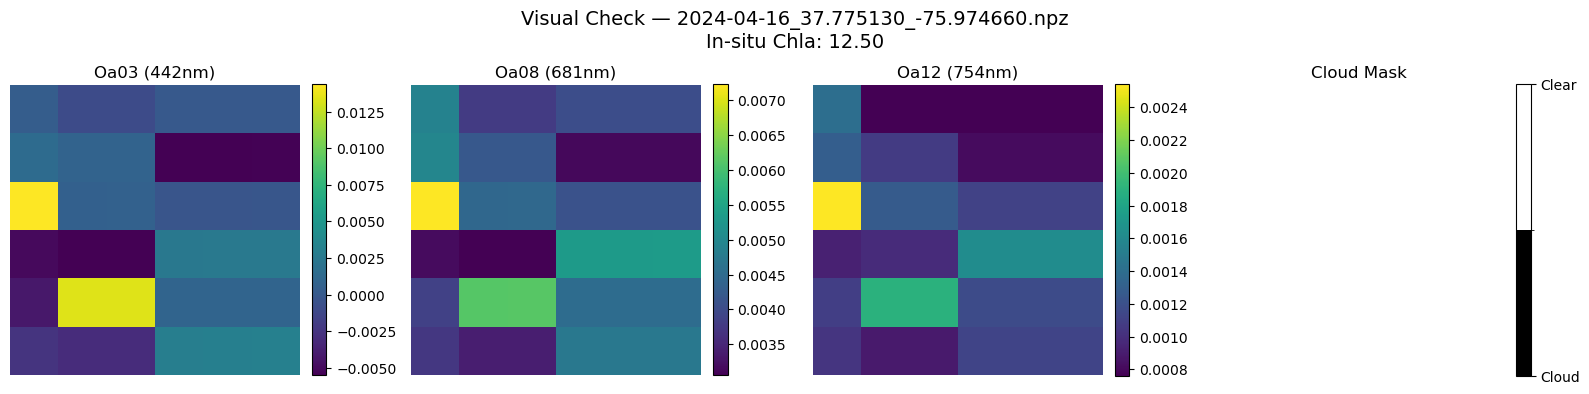

In [51]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import random
import os

# === Pick a random patch from output directory
patch_dir = "MatchedPatches"
patch_files = [f for f in os.listdir(patch_dir) if f.endswith(".npz")]
sample_patch = random.choice(patch_files)
print(f"🎯 Sample patch: {sample_patch}")

# === Load the NPZ file
data = np.load(os.path.join(patch_dir, sample_patch))
cube = data["patch"]          # shape: (6, 6, 16)
cloud_mask = data["cloud_mask"]
chla = data.get("InSitu_Chla", None)  # show measured value if exists

# === Select bands (Oa03 ~ index 2, Oa08 ~ index 7, Oa12 ~ index 11)
band_indices = {"Oa03 (442nm)": 2, "Oa08 (681nm)": 7, "Oa12 (754nm)": 11}

# === Plot selected bands and cloud mask
fig, axes = plt.subplots(1, 4, figsize=(16, 4))
for ax, (band_name, idx) in zip(axes[:3], band_indices.items()):
    im = ax.imshow(cube[:, :, idx], cmap='viridis')
    ax.set_title(f"{band_name}")
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    ax.axis('off')

# === Cloud mask visualization
binary_cmap = mcolors.ListedColormap(['black', 'white'])  # 0=cloud, 1=clear
bounds = [0, 0.5, 1]
norm = mcolors.BoundaryNorm(bounds, binary_cmap.N)

ax = axes[3]
im = ax.imshow(cloud_mask, cmap=binary_cmap, norm=norm)
ax.set_title("Cloud Mask")
cbar = plt.colorbar(im, ax=ax, ticks=[0, 1], fraction=0.046, pad=0.04)
cbar.ax.set_yticklabels(["Cloud", "Clear"])
ax.axis('off')

# === Title with optional Chla value
if chla is not None:
    plt.suptitle(f"Visual Check — {sample_patch}\nIn-situ Chla: {chla:.2f}", fontsize=14)
else:
    plt.suptitle(f"Visual Check — {sample_patch}", fontsize=14)

plt.tight_layout()
plt.show()


## 🚀 Your Turn: Model Training Challenge

Pick your favorite model and start experimenting!  

💡 Hint: Try methods like **Random Forest**.  

Things to try:
- Change the **features** (e.g., band ratios).  
- Adjust the **model architecture** (tree depth, learning rate, number of estimators...).  

Evaluate your results with:
- **R²** (coefficient of determination)  
- **RMSE** (root mean squared error)  
